In [1]:
import pandas as pd
import re

# Import de NTLK et du corpus inaugural
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\guill\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
# Import bible csv
bible_df = pd.read_csv('bible.csv')

In [3]:
# Stats descriptives sur le dataframe
bible_df.rename(columns={
    'b': 'book_id', 
    'c': 'chapter_id',
    'v': 'verse_id',
    't': 'text'
    }, inplace=True)

bible_df

,id,book_id,chapter_id,verse_id,text
0,1001001,1,1,1,In the beginning God created the heaven and th...
1,1001002,1,1,2,"And the earth was without form, and void; and ..."
2,1001003,1,1,3,"And God said, Let there be light: and there wa..."
3,1001004,1,1,4,"And God saw the light, that it was good: and G..."
4,1001005,1,1,5,"And God called the light Day, and the darkness..."
...,...,...,...,...,...
31098,66022017,66,22,17,"And the Spirit and the bride say, Come. And le..."
31099,66022018,66,22,18,For I testify unto every man that heareth the ...
31100,66022019,66,22,19,And if any man shall take away from the words ...
31101,66022020,66,22,20,"He which testifieth these things saith, Surely..."


In [4]:
# Now, clean !

# Use lambda to apply the function to each row of the DataFrame
def remove_all_punctuation(text):
   return re.sub(r'[^\w\s]', ' ', text)

def remove_partial_punctuation(text): # except .!?
   return re.sub(r'[^\w\s.!?]', ' ', text)

def carriage_return(text):
   return re.sub(r'\n', ' ', text)

def remove_double_space(text): # remove when more than 2 spaces
   return re.sub(r'[ ]{2,}', ' ', text)

def remove_empty_strings(text):
    return list(filter(None, text))

def remove_stopwords(text):
   text = tokenize(text)
   filtered_words = [word for word in text if word.lower() not in stopwords.words('english')]
   return filtered_words

def tokenize(text):
   return text.split(' ')

def join(text):
   return ' '.join(text)

def lemmatize(text):
    WNlemma = nltk.WordNetLemmatizer()
    lemmatized = []
    for token in text:
        lemmatized.append(WNlemma.lemmatize(token))
    return lemmatized

def remove_numbers(text):
    numbers = '0123456789'
    for number in numbers:
        text = text.replace(number, '')
    return text

def remove_short_words(word_list):
    return [word for word in word_list if len(word) > 1]

In [5]:
# Text without stopwords
bible_df['cleaned'] = bible_df['text'] \
   .apply(lambda x: remove_stopwords(x)) \ 
   .apply(lambda x: join(x)) \
   .apply(lambda x: carriage_return(x)) \
   .apply(lambda x: remove_double_space(x)) \
   .apply(lambda x: x.lower()) \
   .apply(lambda x: remove_all_punctuation(x)) \
   .apply(lambda x: remove_numbers(x)) \
   .apply(lambda x: tokenize(x)) \
   .apply(lambda x: remove_empty_strings(x)) \
   .apply(lambda x: lemmatize(x)) \
   .apply(lambda x: remove_short_words(x))
   
# Test cleaning efficiency printing the dataframe
bible_df

,id,book_id,chapter_id,verse_id,text,cleaned
0,1001001,1,1,1,In the beginning God created the heaven and th...,"[beginning, god, created, heaven, earth]"
1,1001002,1,1,2,"And the earth was without form, and void; and ...","[earth, without, form, void, darkness, upon, f..."
2,1001003,1,1,3,"And God said, Let there be light: and there wa...","[god, said, let, light, light]"
3,1001004,1,1,4,"And God saw the light, that it was good: and G...","[god, saw, light, good, god, divided, light, d..."
4,1001005,1,1,5,"And God called the light Day, and the darkness...","[god, called, light, day, darkness, called, ni..."
...,...,...,...,...,...,...
31098,66022017,66,22,17,"And the Spirit and the bride say, Come. And le...","[spirit, bride, say, come, let, heareth, say, ..."
31099,66022018,66,22,18,For I testify unto every man that heareth the ...,"[testify, unto, every, man, heareth, word, pro..."
31100,66022019,66,22,19,And if any man shall take away from the words ...,"[man, shall, take, away, word, book, prophecy,..."
31101,66022020,66,22,20,"He which testifieth these things saith, Surely...","[testifieth, thing, saith, surely, come, quick..."


<Axes: xlabel='book_id', ylabel='chapter_id'>

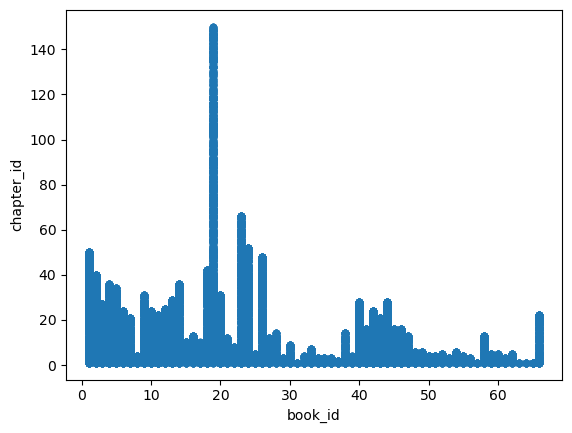

In [9]:
bible_df.plot(x='book_id', y='chapter_id', kind='scatter')
# book_id = représente le livre de la bible (1 = Genèse, 2 = Exode, 3= Lévitique, etc.)
